<a href="https://colab.research.google.com/github/ruttdesai/Image-Classification/blob/main/Image_Classification_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Steps:
#   1. Data Scraping
#   2. Preprocessing
#   3. Splitting the data into Training dataset and Testng Dataset
#   4. Training the model
#   5. Predicting the values
#   6. Checking the accuracy score
#   7. Testing a new image

In [4]:
# To delete a folder along with its contents
#import shutil
#
#dir_path = '/content/images'
#
#try:
#    shutil.rmtree(dir_path)
#except OSError as e:
#    print("Error: %s : %s" % (dir_path, e.strerror))

In [5]:
# Step 1: Data Scraping

!pip install bing-image-downloader # Installing the bing image downloader for bulk downloading
!mkdir images # make a directory called 'images'
from bing_image_downloader import downloader
downloader.download("Parrots",limit=30,output_dir='images') #Search key 1 is "Elephant images"
#Giving the search key to the downloader and setting the limit to 50 images. Giving the destination as 'images folder'

downloader.download("Tigers",limit=30,output_dir='images')  #Search key 2 is "Tiger images"

mkdir: cannot create directory ‘images’: File exists


[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.wallpapers13.com/wp-content/uploads/2016/07/Birds-blue-yellow-parrots-butterfly-tree-with-yellow-flowers-and-green-leaves-beautiful-HD-Desktop-Wallpaper-1600x1200.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://les-animaux-du-monde.wifeo.com/images/p/per/Perroquet-Noir..jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://auchterphotography.com/wp-content/uploads/2013/11/Tropical-Birds-4734.jpg
[Error]Invalid image, not saving http://auchterphotography.com/wp-content/uploads/2013/11/Tropical-Birds-4734.jpg

[!] Issue getting: http://auchterphotography.com/wp-content/uploads/2013/11/Tropical-Birds-4734.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #3 from http://www.wallpapers13.com/wp-content/uploads/2016/04/Eagle-flying-HD-wallpaper-for-Desktop-739-1024x768.jpg
[%] File Downloaded !



In [6]:
# Step 2: Preprocessing
#         1.Resize
#         2.Flattening

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = "/content/images"
CATEGORIES = ['Parrots','Tigers']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Iterating through each category path
  for img in os.listdir(path): #for loop for going into each folder and iterating every image
    img_arr = imread(os.path.join(path,img)) # reading every image
    img_resized = resize(img_arr,(100,100,3)) # resizing every image (It normalizes automatically)
    flat_data.append(img_resized.flatten()) # flattening every image (Converting 2d image into 1d)
    images.append(img_resized) # appending the images into image array
    target.append(class_num)
flat_data = np.array(flat_data) # converting the flattened data array into numpy array
target = np.array(target) # Converting the target data array into numpy array
images = np.array(images) # conveting the images data array into numpy array

<BarContainer object of 2 artists>

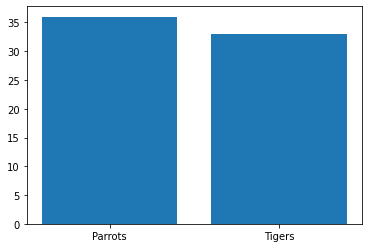

In [7]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [8]:
# Step 3: Splitting the Data into Training Dataset and Testing Dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=42)

In [9]:
# Step 4: Training the model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
# Step 5: Predicting the values
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [11]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [12]:
# Step 6: Checking the accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.6190476190476191

In [13]:
confusion_matrix(y_pred,y_test)

array([[8, 3],
       [5, 5]])

In [14]:
#import pickle
#pickle.dump(clf,open('img_class_model.p','wb'))

Enter your image url: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRIXJoChJMuX2v5eNYmRuQt0JkKQ2eZDgb14w&usqp=CAU
(225, 225, 3)
PREDICTED OUTPUT: Tigers


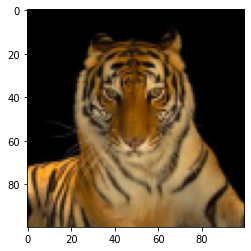

In [16]:
# Step 7: Testing a new image

#model = pickle.load(open('img_class_model.p','rb'))
flat_data = []
url = input("Enter your image url: ")
img = imread(url) 
img_resized = resize(img,(100,100,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')